# Machine Learning


# Home Assignment 2


### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


Сначала определяем позиции, где находятся нули; прибавляем 1, чтобы получить значение 
позиций следующих элементов.
Далее ограничиваем переменную длиной вектора, чтобы не выйти за его границы в случае если ноль является последним 
элементом:

In [2]:
def max_element(arr):
    afterzero = np.where(arr == 0)[0] + 1  
    afterzero = afterzero[afterzero < len(arr)]
    if len(afterzero) == 0:
        return None
    else:
        return np.max(arr[afterzero])

Проверяем, работает ли функция:

In [3]:
print(max_element(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])))
print(max_element(np.array([6, 4, 3, 9, 2])))
print(max_element(np.array([])))

5
None
None


**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

Определяем разность матрицы Х и единичной матрицы такой же размерности, умноженной на v. 
Позиция минимального элемента в ней - это и будет ближайший элемент.

In [4]:
def nearest_value(X, v):
    new_matrix = np.abs(X - v*np.ones(X.shape)) 
    minimum = np.min(new_matrix) 
    statement = np.where(new_matrix == minimum) 
    return X[statement[0][0], statement[1][0]] 

Проверка:

In [5]:
X = np.arange(0,10).reshape((2, 5))
print(nearest_value(X, 3.6))

4


**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [6]:
def scale(X):
    matrix_x = X - np.reshape(X.shape[0]*list(np.mean(X, axis = 0)), newshape=X.shape) 
    adj = list(map(lambda x: 1 if x == 0 else 0, np.mean(X, axis = 0))) 
    std = np.reshape(X.shape[0]*list(np.std(X, axis = 0) + adj), newshape=X.shape)
    return matrix_x / std

Протестируем на случайной матрице:

In [7]:
X = np.random.randint(-10, 10, size = (3,4))
print(scale(X))

[[-0.88900089  1.14676436  1.3466376  -0.20203051]
 [ 1.3970014   0.14334554 -0.2992528   1.31319831]
 [-0.50800051 -1.2901099  -1.0473848  -1.1111678 ]]


**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [8]:
def get_stats(X):
    determinant = np.linalg.det(X)
    trace = np.trace(X)
    minimum = np.min(X)
    maximum = np.max(X)
    fr_normal = np.linalg.norm(X)
    eig_values = np.linalg.eigvals(X)
    inverse_m = np.linalg.inv(X)
    return determinant, trace, minimum, maximum, fr_normal, eig_values, inverse_m

Тестируем:

In [9]:
X = np.random.normal(10, 1, size = (3,3)) 
get_stats(X)

(27.751220277062654,
 27.816591992878088,
 8.683819618178104,
 11.062722952905675,
 29.77706817669651,
 array([ 29.65132176+0.j        ,  -0.91736489+0.30718098j,
         -0.91736489-0.30718098j]),
 array([[-0.41593763, -0.22817748,  0.74946443],
        [ 0.3931479 , -0.5749273 ,  0.25001053],
        [ 0.07400307,  0.79291338, -0.93576186]]))

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [10]:
norm_matr = []
for sum in range(100): 
    X, Y = np.random.normal(0, 1, size = (10, 10)), np.random.normal(0, 1, size = (10, 10))
    mult = np.dot(X, Y) 
    norm_matr += [np.max(mult)]
norm_matr = np.array(norm_matr) 
print("Среднее значение ", np.mean(norm_matr))
print("95% квантиль: ", np.percentile(norm_matr, 95))

Среднее значение  8.26951888546
95% квантиль:  11.3720138377


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [11]:
import pandas as pd
data_1 = pd.read_csv('2008.csv')
data_1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Посчитаем общее количество пропусков:

In [12]:
data_1.isnull().sum(axis = 0).sum() 

355215

Посчитаем количество пропусков по объектам:

In [13]:
miss = np.array(data_1.shape[1] - data_1.count(axis = 1)) 
len(miss.nonzero()[0]) 

70000

Посчитаем количество пропусков по признакам:

In [14]:
miss = np.array(data_1.shape[0] - data_1.count(axis = 0))  
len(miss.nonzero()[0]) 

16

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

Посчитаем количество пропусков в целевой переменной:

In [15]:
(data_1.shape[0] - data_1.count(axis = 0))['DepDelay']

1399

In [16]:
data_1[data_1['DepDelay'].isnull()].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Заметим, что можно убрать признак Cancelled, так как все полеты, где пропущена целевая переменная, имеют Cancelled = 1: 

In [17]:
new_data = data_1[data_1['DepDelay'].notnull()] 
new_data = new_data[new_data['DepDelay'] != 0] 
new = new_data['DepDelay']
new_data = new_data.drop(['Cancelled', 'DepDelay'], axis = 1)

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [18]:
task = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for n in task:
    new_data[n + '_Hour'] = new_data[n] // 100 
    new_data[n + '_Minute'] = new_data[n] % 100
new_data = new_data.drop(task, axis = 1)

In [19]:
new_data.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0


**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Признак ArrDelay состоит из суммы CarrierDelay, WeatherDelay, NASDelay, SecurityDelay,
LateAircraftDelay (как разные причины задержки самолёта), поэтому можно удалить их:

In [20]:
new_data = new_data.drop(['CarrierDelay', 'WeatherDelay', 
                          'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TailNum', 'Year'], axis = 1)

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

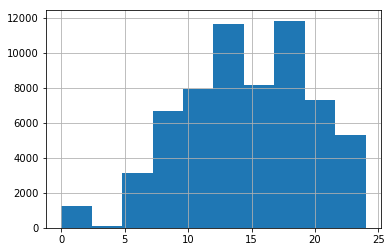

In [21]:
new_data['ArrTime_Hour'].hist()

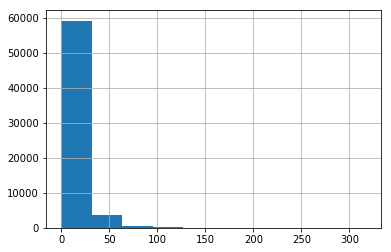

In [22]:
new_data['TaxiOut'].hist()

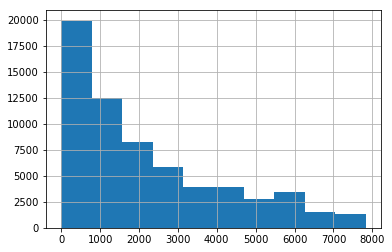

In [23]:
new_data['FlightNum'].hist()

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Область значений признака сильно варьируется - достигает 8000, что может привести к слишком большим коэффициентам в линейных моделях. Масштабирование помогает в подобных случаях, когда масштаб одного или нескольких признаков существенно превосходит масштабы остальных признаков, вследствие чего их значения практически не будут влиять на ответы алгоритма

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

In [30]:
def transform_data(data):
    data_2 = pd.get_dummies(data) 
    imputer = Imputer()    
    data_2 = imputer.fit_transform(data_2) 
    scaler = StandardScaler()
    return scaler.fit_transform(data_2)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [31]:
final_data = transform_data(new_data)
final_data.shape

(63404, 636)

In [32]:
print(str(final_data.shape[1]) + ' признаков')

636 признаков


**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [36]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, new, test_size = 0.3)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
lr = LinearRegression()
lr.fit(X_train[0:1000], y_train[0:1000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

На тренировочной выборке модель получается лучше:

In [37]:
print ("MSE на train выборке", mean_squared_error(lr.predict(X_train[0:1000]), y_train[0:1000]))
print ("MSE на test выборке", mean_squared_error(lr.predict(X_test[0:1000]), y_test[0:1000]))
print ("R^2 на train выборке", r2_score(lr.predict(X_train[0:1000]), y_train[0:1000]))
print ("R^2 на test выборке", r2_score(lr.predict(X_test[0:1000]), y_test[0:1000]))

MSE на train выборке 8.2600466549e-26
MSE на test выборке 1229.64689244
R^2 на train выборке 1.0
R^2 на test выборке 0.535657961682


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [38]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold

Для Lasso эффект переобучения стал намного меньше:

In [39]:
kfold = KFold(1000, n_folds = 6)
lasso = LassoCV(cv = kfold, max_iter = 10000)
lasso.fit(X_train[0:1000], y_train[0:1000])

print ('Alpha: ' + str(lasso.alpha_))
print("MSE на train выборке: ", mean_squared_error(lasso.predict(X_train[0:1000]), y_train[0:1000]))
print("MSE на test выборке: ", mean_squared_error(lasso.predict(X_test[0:1000]), y_test[0:1000]))
print("R^2 на train выборке: ", r2_score(lasso.predict(X_train[0:1000]), y_train[0:1000]))
print("R^2 на test выборке: ", r2_score(lasso.predict(X_test[0:1000]), y_test[0:1000]))

Alpha: 0.0412922271883
MSE на train выборке:  0.337375536007
MSE на test выборке:  1.35910607719
R^2 на train выборке:  0.999720098986
R^2 на test выборке:  0.998990273505


Для Риджа R2 также близко к 1:

In [40]:
kfold_1 = KFold(1000, n_folds = 6)
ridge = RidgeCV(cv = kfold_1)
ridge.fit(X_train[0:1000], y_train[0:1000])

print ('Alpha: ' + str(ridge.alpha_))
print("MSE на train выборке", mean_squared_error(ridge.predict(X_train[0:1000]), y_train[0:1000]))
print("MSE на test выборке", mean_squared_error(ridge.predict(X_test[0:1000]), y_test[0:1000]))
print("R^2 на train выборке", r2_score(ridge.predict(X_train[0:1000]), y_train[0:1000]))
print("R^2 на test выборке", r2_score(ridge.predict(X_test[0:1000]), y_test[0:1000]))

Alpha: 0.1
MSE на train выборке 0.0127016937115
MSE на test выборке 1.61652873981
R^2 на train выборке 0.999989573825
R^2 на test выборке 0.998812257374


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [41]:
np.append(X_train, 1)
np.append(X_test, 1)

array([ 0.76063301,  0.14301822, -0.46276733, ..., -0.00888063,
       -0.01050787,  1.        ])

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [42]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return X.dot(w)  

In [45]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    return sum((y - make_pred(X, w)/y)**2)/len(w)  

In [46]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    return -(2./len(w)) * (X.T.dot((y - X.dot(w))/y**2)) 

In [47]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    return get_func(w, X, y) + np.linalg.norm(w)

In [54]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    return get_grad(w, X, y) + 2*w

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

Выбираем функцию ошибок и градиент в зависимости от того, требуется ли регуляризация или нет. 
Для графика запоминаем ошибки error.

In [55]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    errors = []
    w = np.random.randint(10, size=X.shape[1])
    w_new = None
    if is_reg:
        func_grad = get_reg_grad
        func_err = get_reg_func
    else:
        func_grad = get_grad
        func_err = get_func
    for i in range(max_iter):
        errors += [func_err(w, X, y)]  
        w_new = w - step_size*func_grad(w, X, y)  
        if np.linalg.norm(w - w_new) < eps:  
            break
        w = w_new  
    return w, errors